In [1]:
from fastai.vision.all import *

/home/bach/anaconda3/envs/fastai_book/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/bach/anaconda3/envs/fastai_book/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


# Some fastai image recognizer

In [2]:
path = untar_data(URLs.PETS)/'images'

In [3]:
def is_cat(x): 
    return x[0].isupper()

In [4]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

In [5]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

/home/bach/anaconda3/envs/fastai_book/lib/python3.10/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [6]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time


# Segmentation

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
path, bs=8, fnames = get_image_files(path/"images"),
label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
codes = np.loadtxt(path/'codes.txt', dtype=str)
)
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.898901,2.405589,00:03


/home/bach/anaconda3/envs/fastai_book/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /opt/conda/envs/bld/conda-bld/pytorch-select_1719512383855/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


epoch,train_loss,valid_loss,time
0,1.655173,1.553610,00:04
1,1.457372,1.320649,00:03
2,1.327778,1.141425,00:05
3,1.202166,0.896375,00:03
4,1.071909,0.831827,00:03
5,0.964447,0.776036,00:03
6,0.880901,0.772115,00:03
7,0.815191,0.760914,00:03


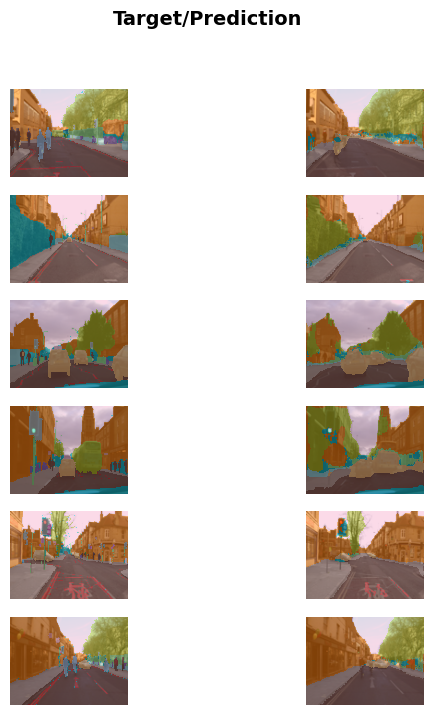

In [ ]:
learn.show_results(max_n=6, figsize=(7, 8))

# NLP 

In [4]:
from fastai.text.all import *

In [5]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

In [6]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [7]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.464676,0.415389,0.812680,03:32


epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [ ]:
learn.predict('This movie sucks')

NameError: name 'learn' is not defined

# Tabular data

In [8]:
from fastai.tabular.all import *

In [9]:
path = untar_data(URLs.ADULT_SAMPLE)

In [10]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
    'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

/home/bach/anaconda3/envs/fastai_book/lib/python3.10/site-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [11]:
learn = tabular_learner(dls, metrics=accuracy)

In [12]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.381884,0.367723,0.828010,00:06
1,0.353433,0.351508,0.836763,00:05
2,0.345067,0.348176,0.840909,00:04


In [13]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,2.0,5.0,13.0,4.0,5.0,1.0,-1.364003,0.443851,-1.205284,0.0,0.0
1,5.0,12.0,3.0,4.0,1.0,5.0,1.0,0.176266,0.043079,-0.422457,1.0,0.0
2,6.0,10.0,3.0,5.0,1.0,5.0,1.0,-0.850580,-0.661386,1.143196,1.0,1.0
3,5.0,16.0,5.0,13.0,2.0,5.0,1.0,-1.217311,-0.620314,-0.031044,0.0,0.0
4,5.0,12.0,1.0,7.0,2.0,5.0,1.0,0.322958,1.975226,-0.422457,0.0,0.0
5,5.0,16.0,5.0,2.0,4.0,3.0,1.0,-1.070619,4.826478,-0.031044,0.0,0.0
6,8.0,9.0,1.0,14.0,2.0,5.0,1.0,0.542996,1.309262,0.360369,0.0,0.0
7,7.0,10.0,1.0,5.0,2.0,2.0,1.0,0.616342,-0.255242,1.143196,0.0,0.0
8,5.0,10.0,3.0,2.0,6.0,5.0,1.0,-0.630542,0.164662,1.143196,0.0,1.0


# RecSys

In [14]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.509528,1.396116,00:00


epoch,train_loss,valid_loss,time
0,1.376534,1.341131,00:00
1,1.278461,1.183081,00:00
2,1.045534,0.906455,00:00
3,0.782012,0.754351,00:00
4,0.682922,0.719113,00:00
5,0.627492,0.711730,00:00
6,0.606381,0.707519,00:00
7,0.591612,0.700795,00:00
8,0.612139,0.699054,00:00
9,0.602742,0.698974,00:00


In [15]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,68.0,69.0,5.0,4.175674
1,99.0,80.0,4.5,4.290388
2,51.0,28.0,3.0,3.304393
3,72.0,33.0,3.0,3.088733
4,31.0,74.0,4.0,3.827495
5,47.0,48.0,5.0,4.190459
6,20.0,23.0,3.0,3.029512
7,18.0,35.0,3.5,3.768645
8,54.0,1.0,2.0,3.640513
